## Framingham Heart Study

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk



 Male: male or female(Nominal)

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral

• Current Smoker: whether or not the patient is a current smoker (Nominal)

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)


• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

Predict variable (desired target)
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [1]:
# Importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the Dataset
df = pd.read_csv('framingham.csv')

In [3]:
# first 5 rows of the dataset
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
# last 5 rows of the dataset
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [5]:
# Shape of Dataset
df.shape

(4238, 16)

In [6]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


## Missing value treatment

In [7]:
# Check the columns name
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [8]:
# Checking the no of missing value in each column
df.isnull().sum()/len(df)*100

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

### We can examine that we got null values in following features :
*    education (105) - 2.47%
*    cigsPerDay (29) - 0.68%
*    BPMeds (53) - 1.25%
*    totChol (50) - 1.17%
*    BMI (19) - 0.44%
*    heartRate (1) - 0.02%
*    glucose (388) - 9.15%
    

In [9]:
# missing value handling
for i in ['education','cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose']:
    df[i].fillna(df[i].median(),inplace=True)

In [10]:
#Rechecking if we have any missing value left
df.isnull().sum()/len(df)*100

male               0.0
age                0.0
education          0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

In [11]:
# renaming male to Sex_male
df.rename(columns={"male": "Sex_male"}, inplace=True)

In [12]:
# Again rechecking the column name
df.columns

Index(['Sex_male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [13]:
# Extracting Unique Values from the 'TenYearCHD' Column
df['TenYearCHD'].unique()

array([0, 1], dtype=int64)

In [14]:
cat_cols = ['Sex_male','education', 'currentSmoker','BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes']

In [15]:
for col in cat_cols:
    print(col)
    print('----------------')
    print(df[col].value_counts())
    print(' ')

Sex_male
----------------
0    2419
1    1819
Name: Sex_male, dtype: int64
 
education
----------------
1.0    1720
2.0    1358
3.0     687
4.0     473
Name: education, dtype: int64
 
currentSmoker
----------------
0    2144
1    2094
Name: currentSmoker, dtype: int64
 
BPMeds
----------------
0.0    4114
1.0     124
Name: BPMeds, dtype: int64
 
prevalentStroke
----------------
0    4213
1      25
Name: prevalentStroke, dtype: int64
 
prevalentHyp
----------------
0    2922
1    1316
Name: prevalentHyp, dtype: int64
 
diabetes
----------------
0    4129
1     109
Name: diabetes, dtype: int64
 


## EDA

In [16]:
len(cat_cols)

7

In [17]:
sns.set_style('whitegrid')
sns.set_palette('Set2')

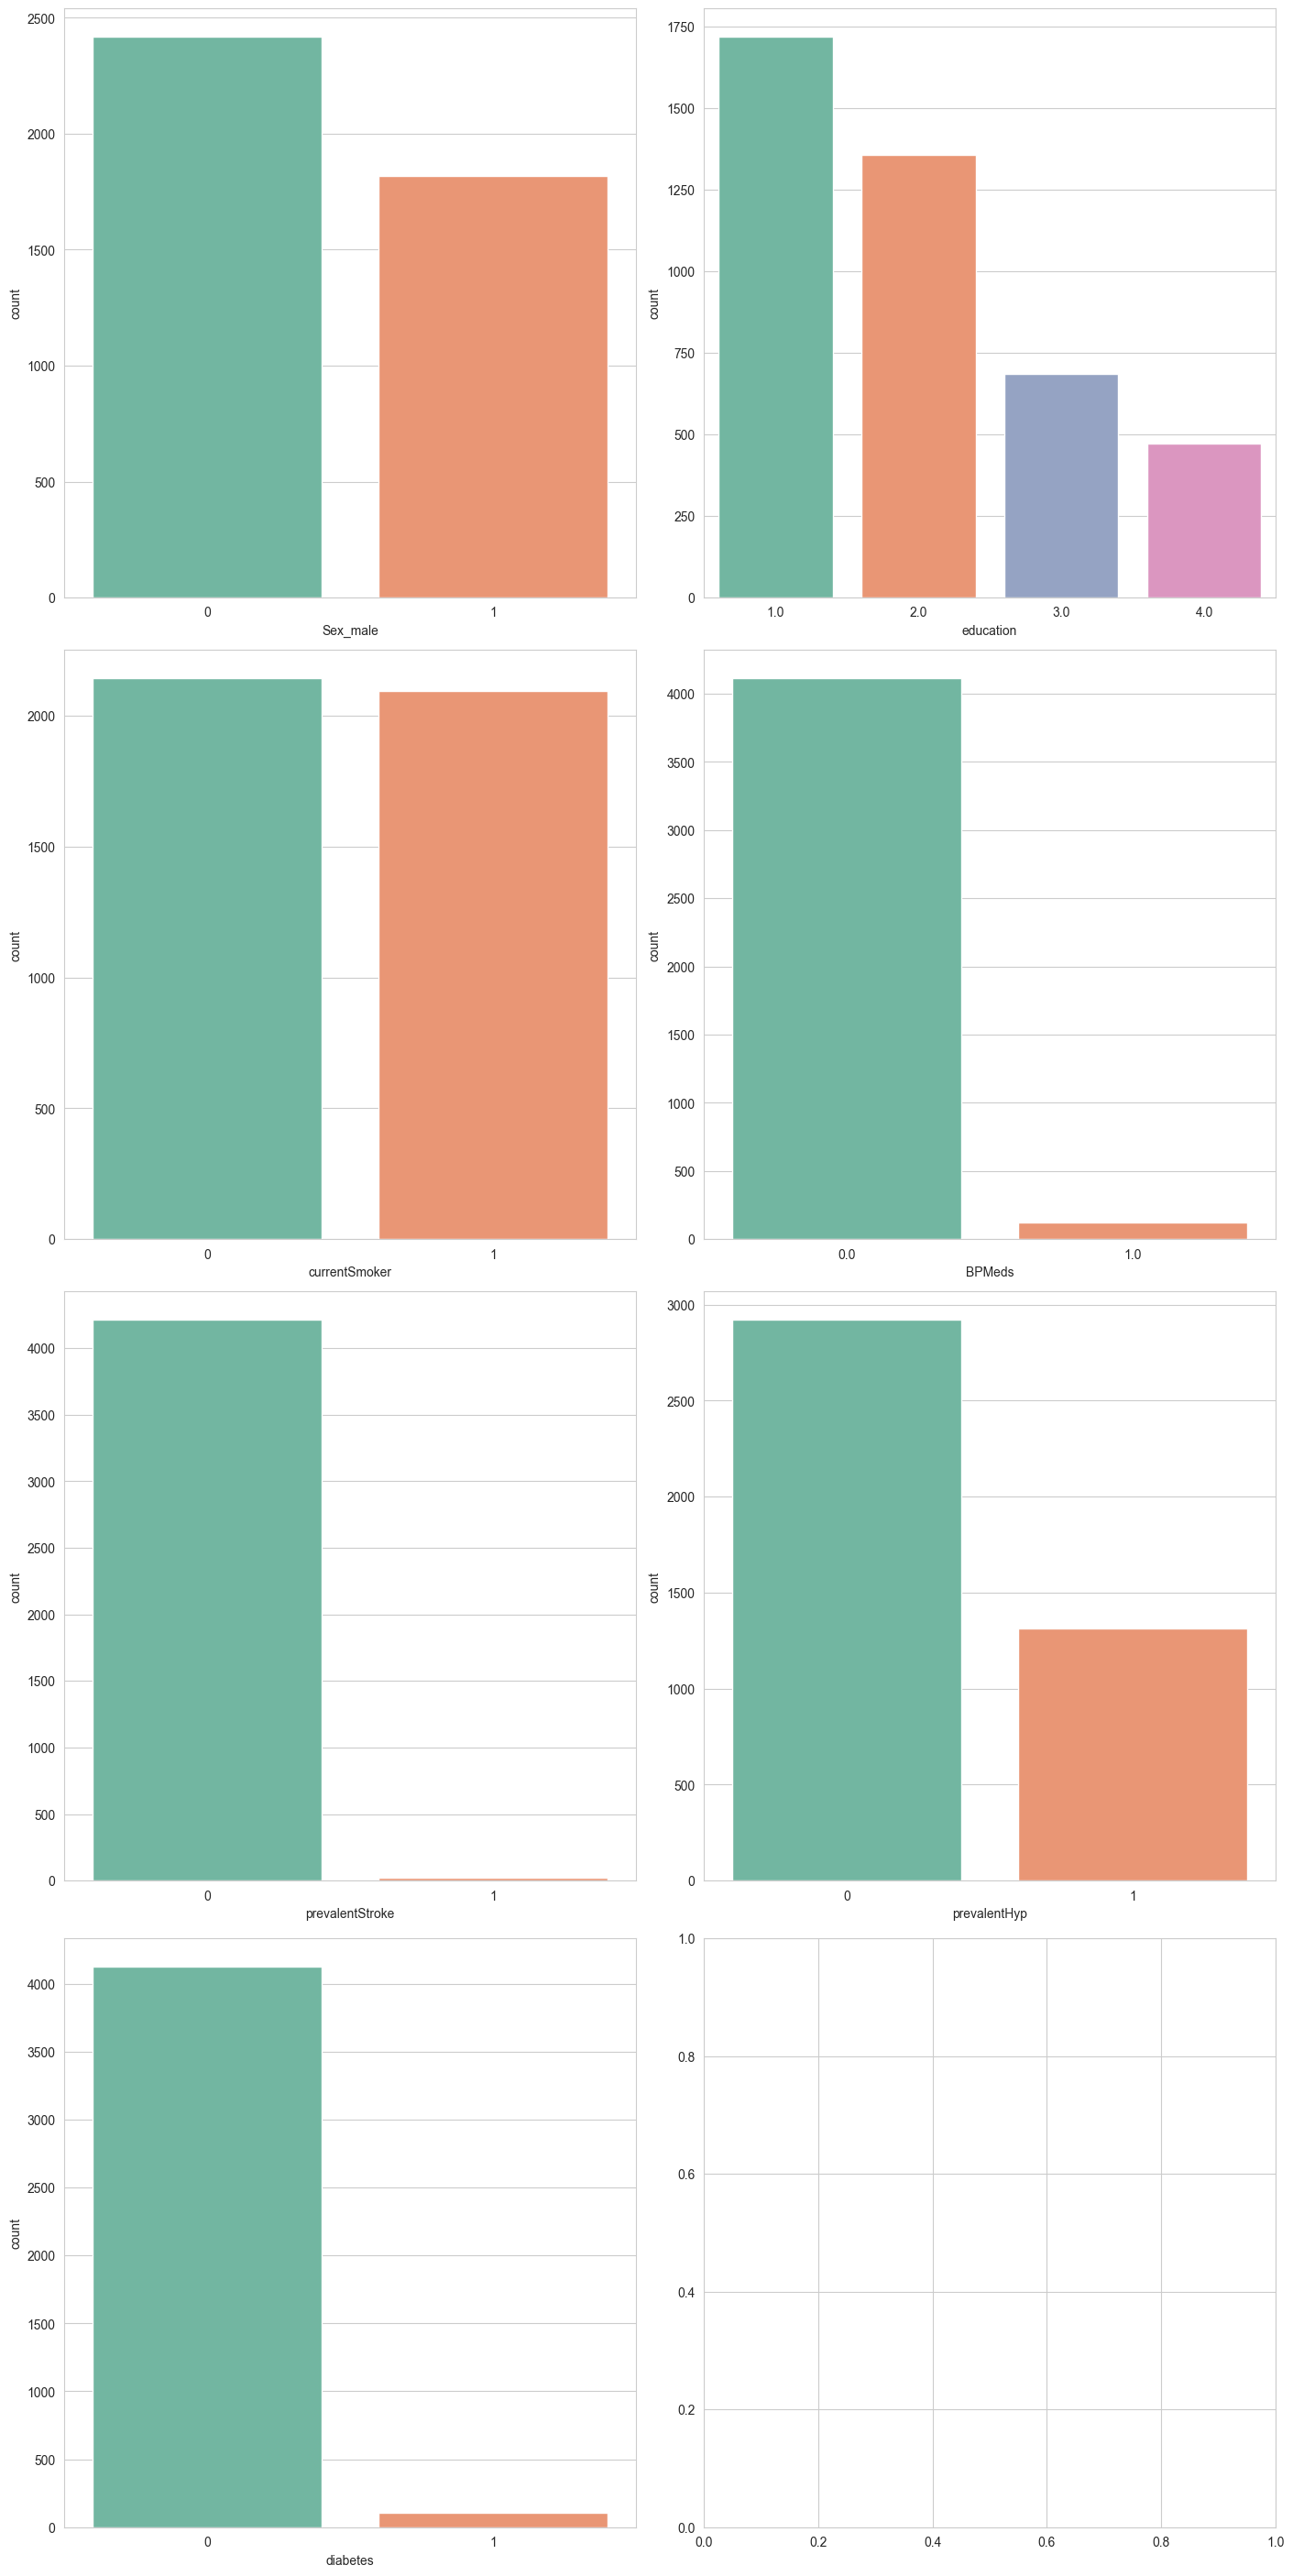

In [23]:
num_plots = len(cat_cols)
total_cols = 2
total_rows = num_plots // total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols, figsize=(7 * total_cols, 7 * total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(cat_cols):
    row = i // total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=df, ax=axs[row][pos])
plt.show()

In [19]:
num_col = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

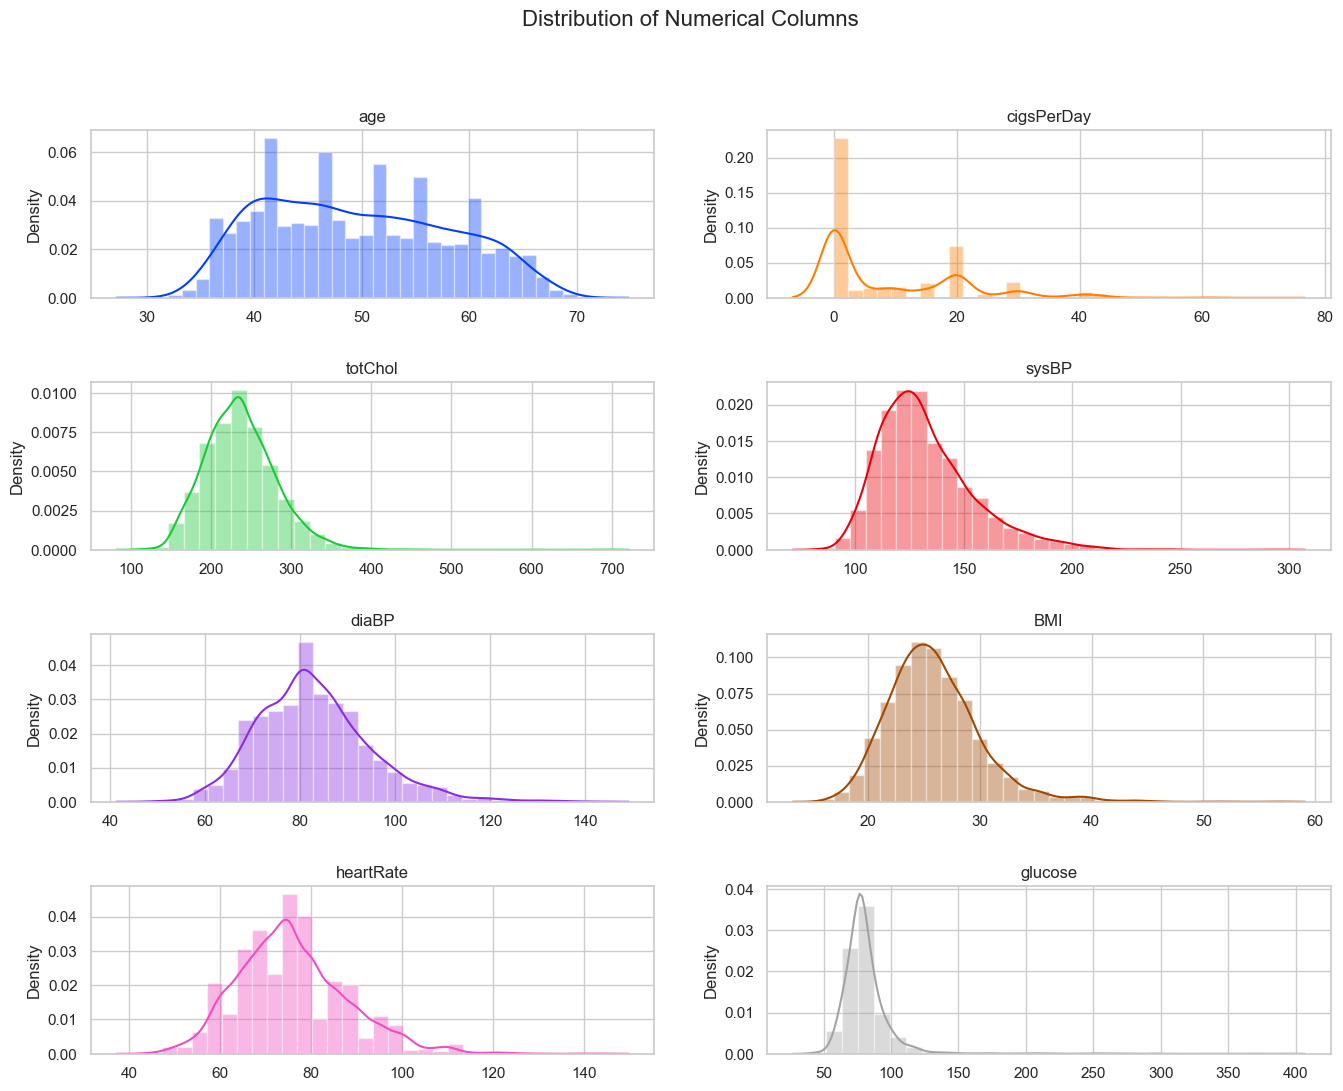

In [20]:
colors = sns.color_palette("bright", len(num_col))

sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))
plt.subplots_adjust(hspace=0.5)
for indx, col in enumerate(num_col):
    plt.subplot(4, 2, indx + 1)
    sns.distplot(df[col], color=colors[indx], kde=True, bins=30)
    plt.title(col)
    plt.xlabel('')
plt.suptitle('Distribution of Numerical Columns', fontsize=16)
# Display the plot
plt.show()

## Bi-variate Analysis

In [21]:
df['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [22]:
100*df['TenYearCHD'].value_counts()/len(df)

0    84.804153
1    15.195847
Name: TenYearCHD, dtype: float64

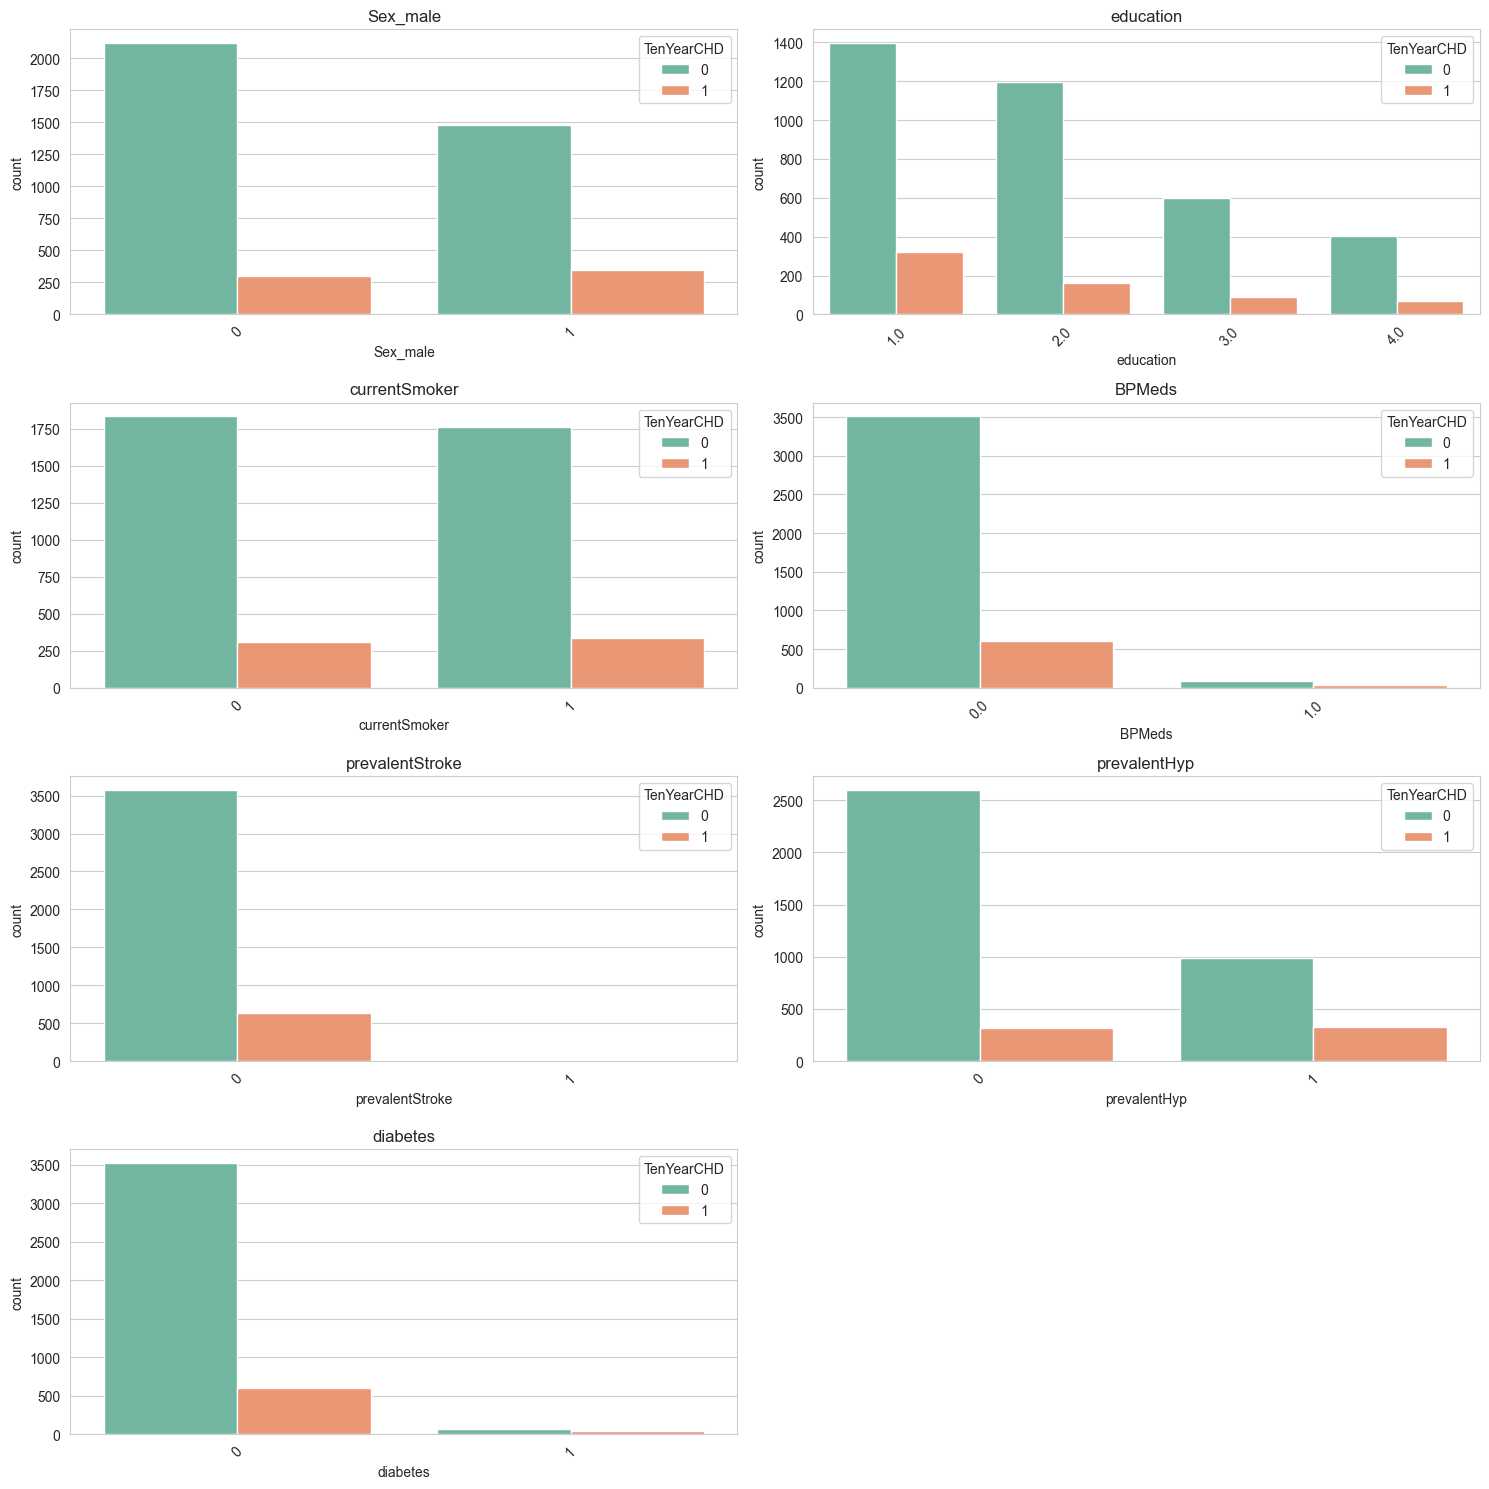

In [25]:
sns.set_palette('Set2')
plt.figure(figsize=(15, 15))  # Increase the figure size for better visualization
num_plots = len(cat_cols)

# Determine the grid dimensions based on the number of plots
num_rows = (num_plots + 1) // 2
num_cols = 2

for i, col in enumerate(cat_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.title(col)
    sns.countplot(x=col, data=df, hue='TenYearCHD')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

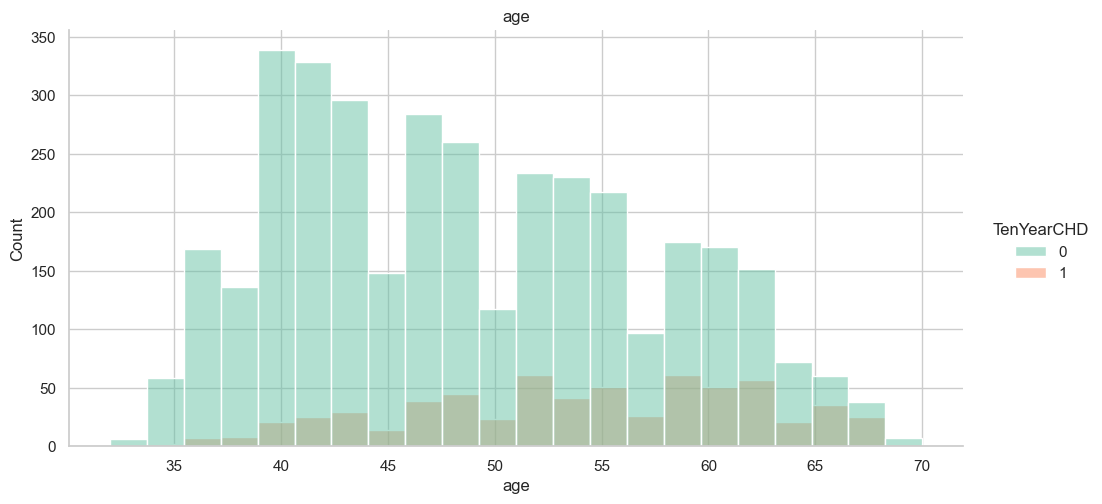

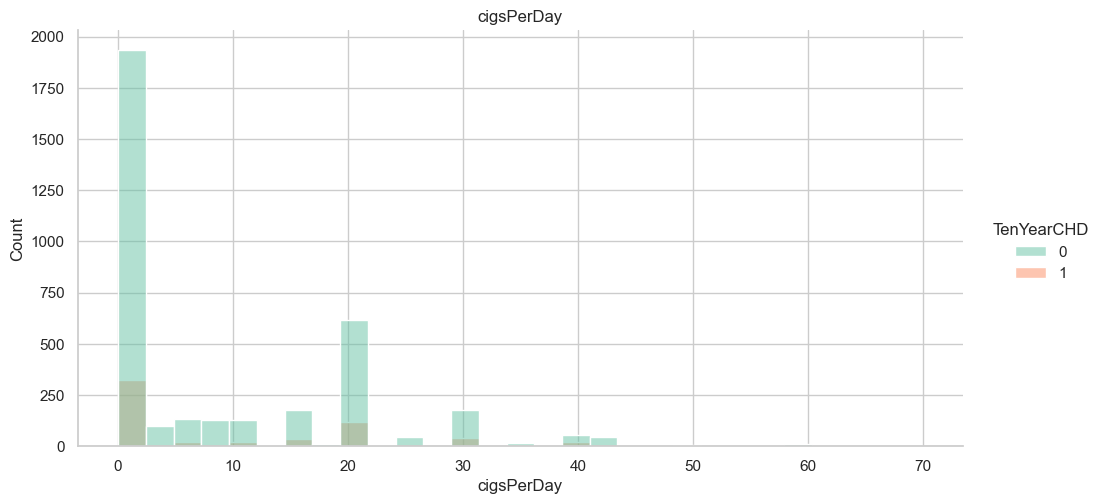

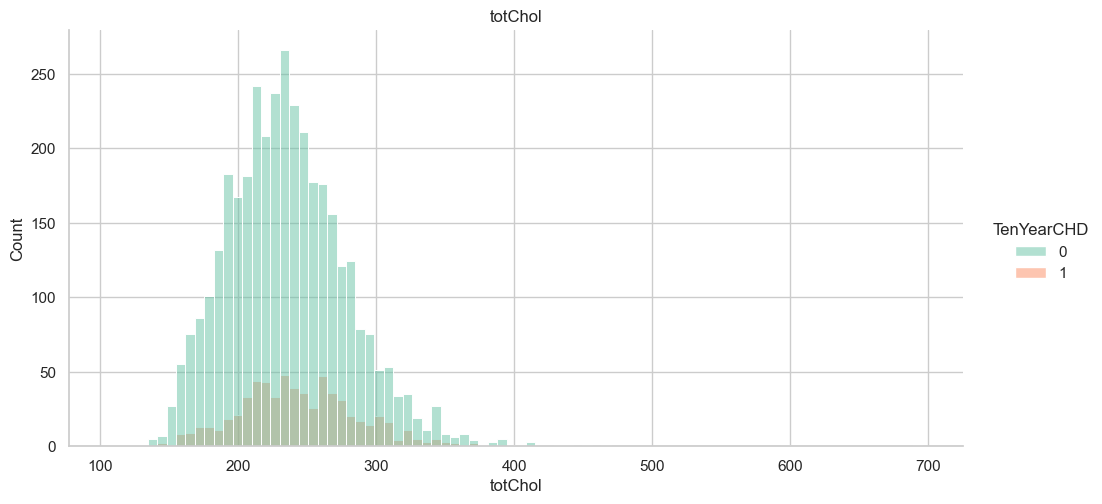

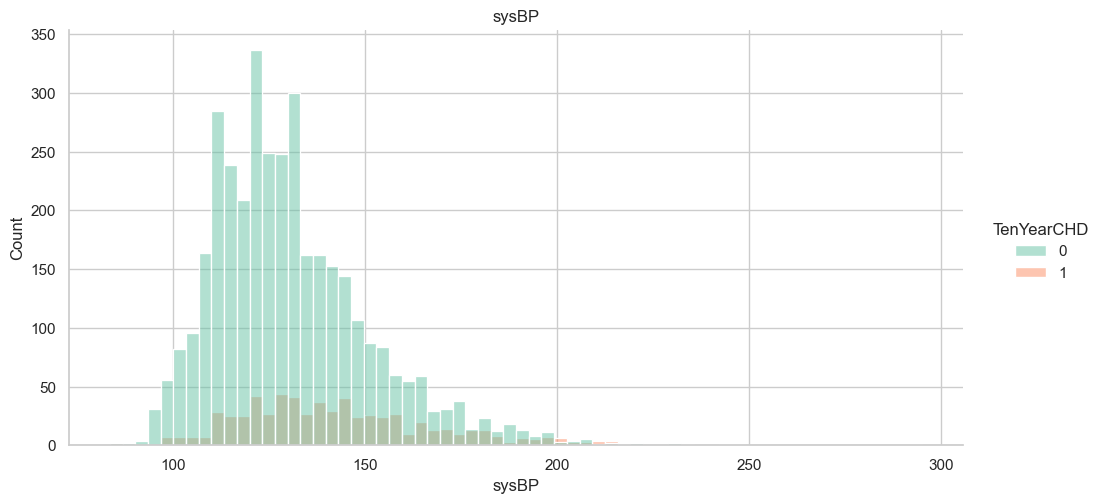

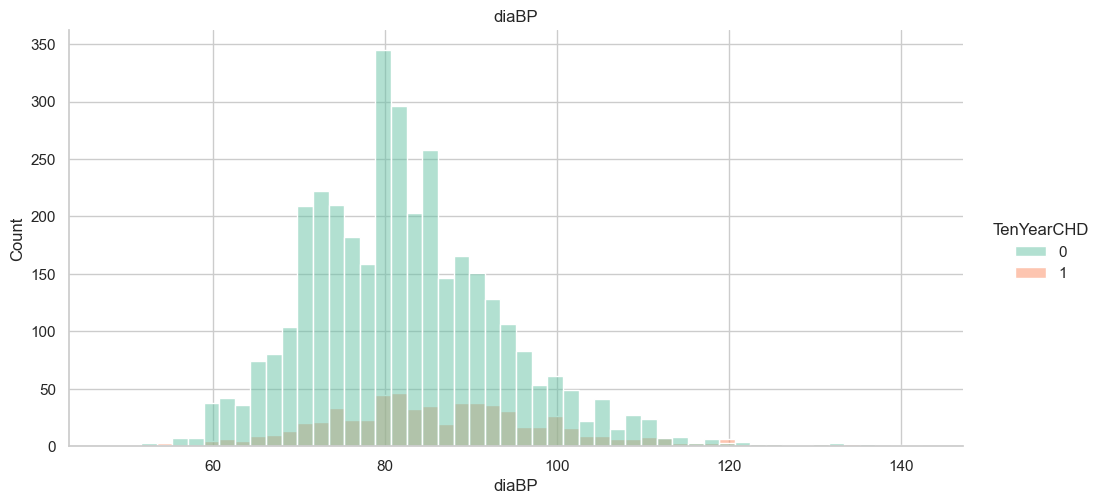

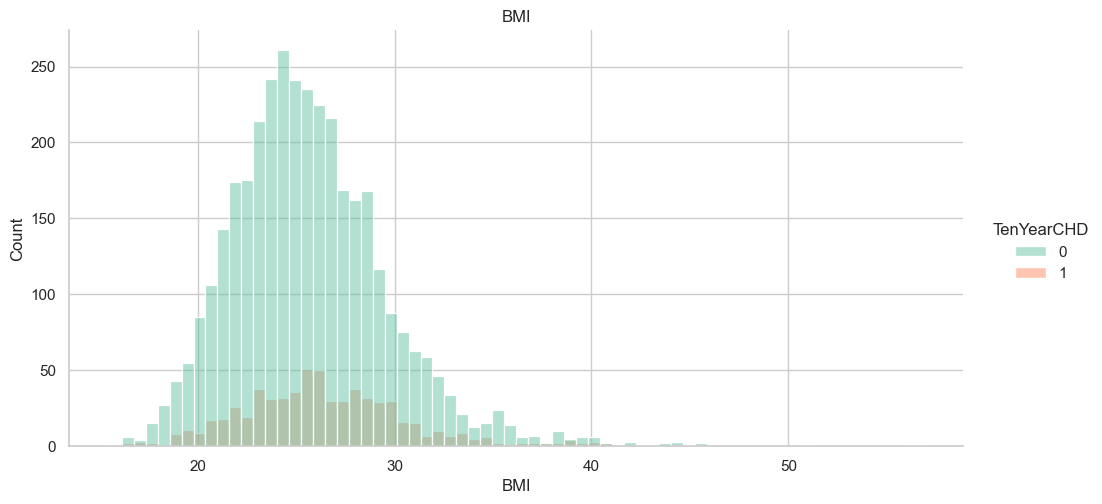

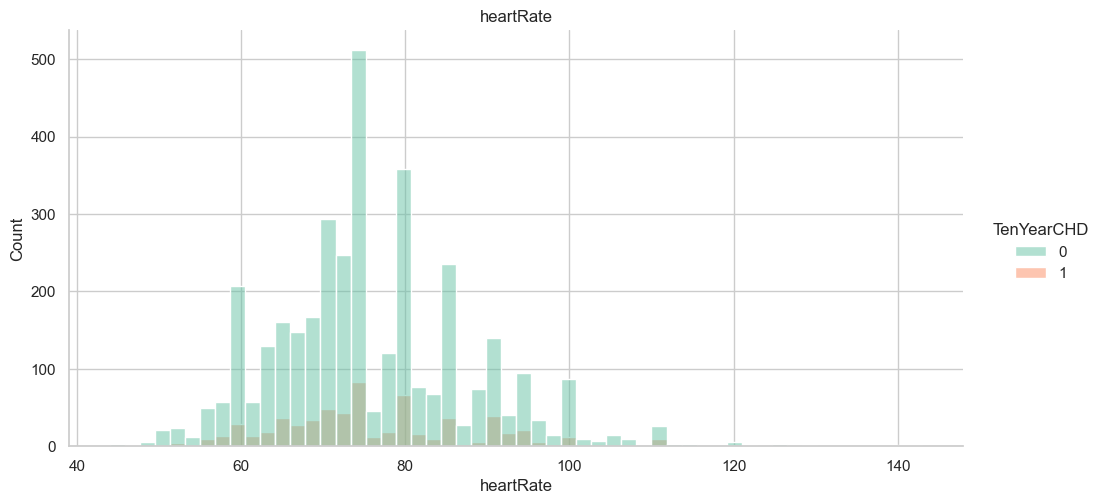

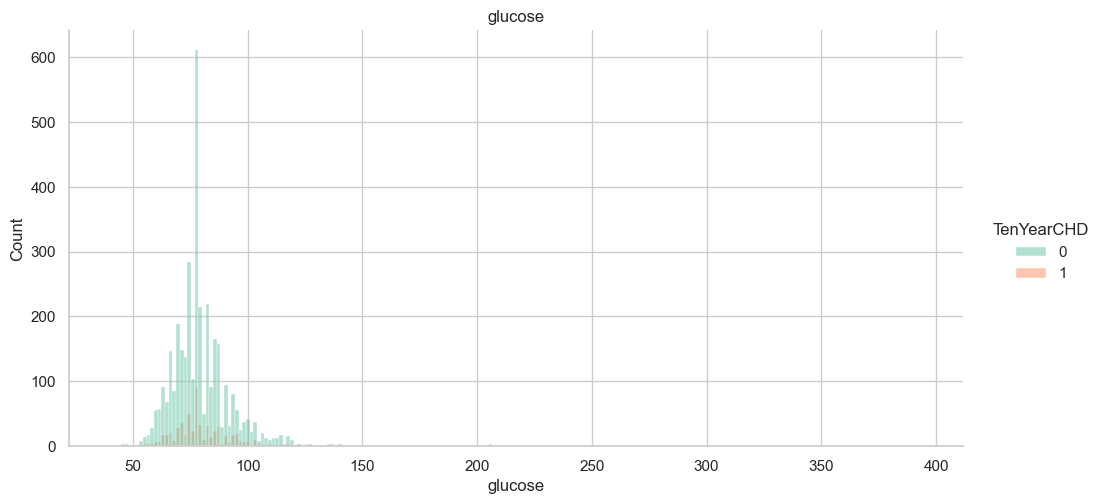

In [24]:
sns.set_palette('Set2')
for indx,col in enumerate(num_col):
    sns.displot(data=df,x=col,hue='TenYearCHD',aspect=2)
    plt.title(col)
    plt.show()

<AxesSubplot:xlabel='TenYearCHD', ylabel='sysBP'>

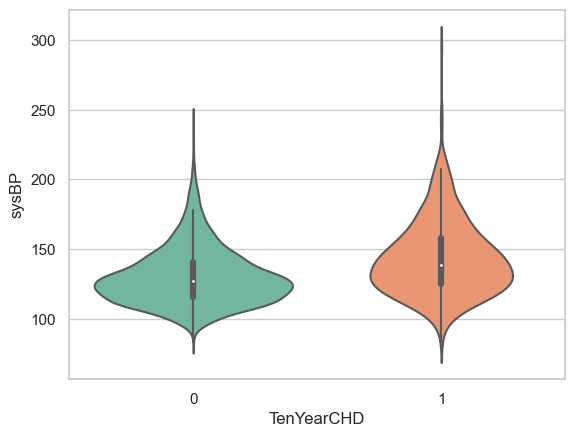

In [25]:
# Violin plot comparing Ten-Year CHD with systolic blood pressure.
sns.violinplot(y='sysBP',x='TenYearCHD',data=df)

<AxesSubplot:xlabel='TenYearCHD', ylabel='BMI'>

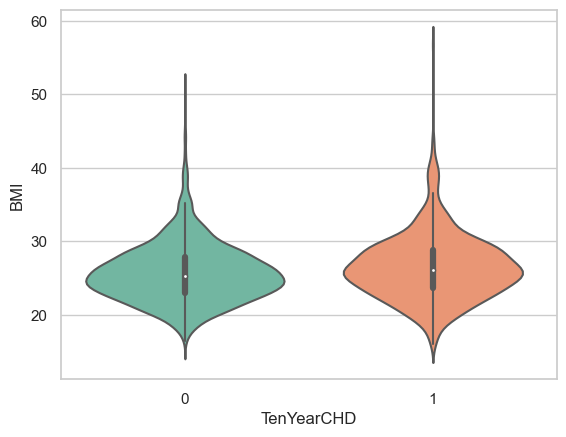

In [26]:
# Violin plot of BMI by Ten-Year CHD status.
sns.violinplot(y='BMI',x='TenYearCHD',data=df)

<AxesSubplot:xlabel='TenYearCHD', ylabel='glucose'>

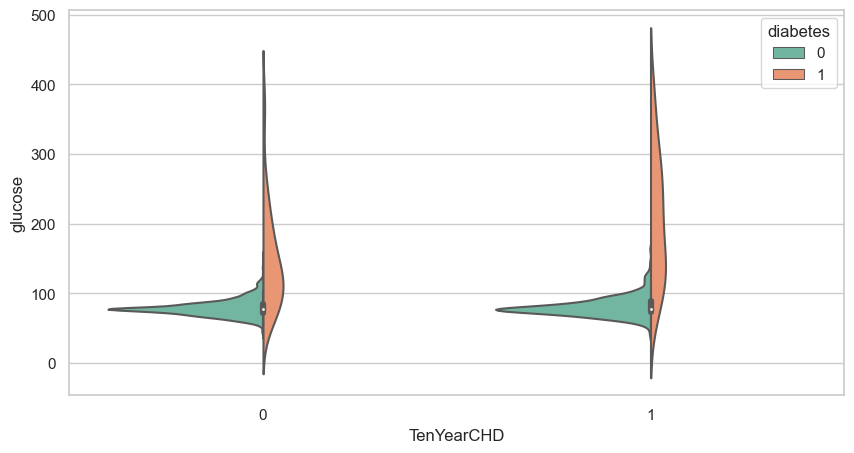

In [27]:
# Violin plot comparing glucose levels by diabetes status and CHD
plt.figure(figsize=(10,5))
sns.violinplot(y='glucose',hue='diabetes',data=df,x='TenYearCHD',split=True)

In [28]:
correlation_matrix = df.corr()

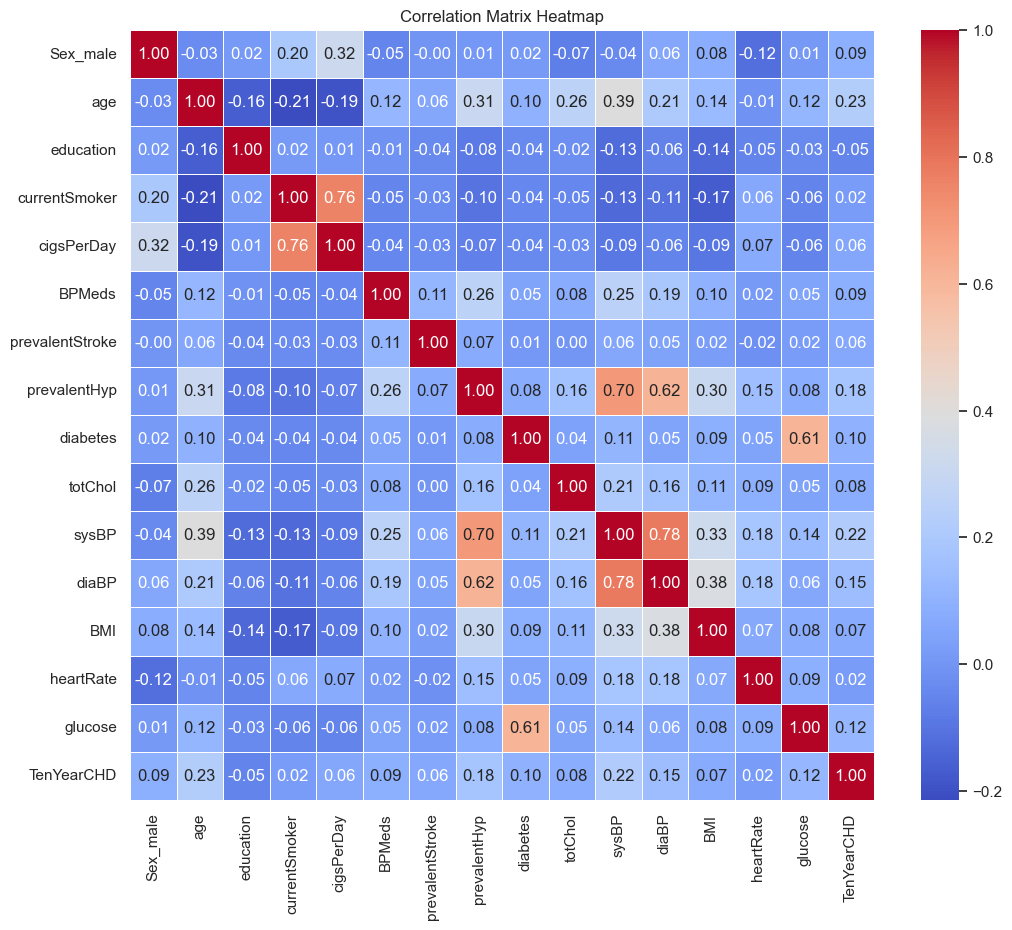

In [29]:
#Pearson Correlation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

## Identify strong positive and strong negative correlation

In [30]:
correlation_matrix = df.corr()
strong_positive_corr_threshold = 0.7
strong_negative_corr_threshold = -0.7

strong_positive_corr  = correlation_matrix[correlation_matrix  > strong_positive_corr_threshold]
strong_positive_corr = strong_positive_corr[strong_positive_corr < 1]
strong_positive_corr = strong_positive_corr.dropna(how='all', axis=1).dropna(how='all', axis=0)

In [31]:
print("Strong positive Correlations:")
print(strong_positive_corr)

Strong positive Correlations:
               currentSmoker  cigsPerDay     sysBP     diaBP
currentSmoker            NaN    0.760239       NaN       NaN
cigsPerDay          0.760239         NaN       NaN       NaN
sysBP                    NaN         NaN       NaN  0.784002
diaBP                    NaN         NaN  0.784002       NaN


In [32]:
strong_negative_corr = correlation_matrix[correlation_matrix < strong_negative_corr_threshold]
strong_negative_corr = strong_negative_corr.dropna(how='all', axis=1).dropna(how='all',axis=0)

In [33]:
print("Strong Negative Correlation:")
print(strong_negative_corr)

Strong Negative Correlation:
Empty DataFrame
Columns: []
Index: []


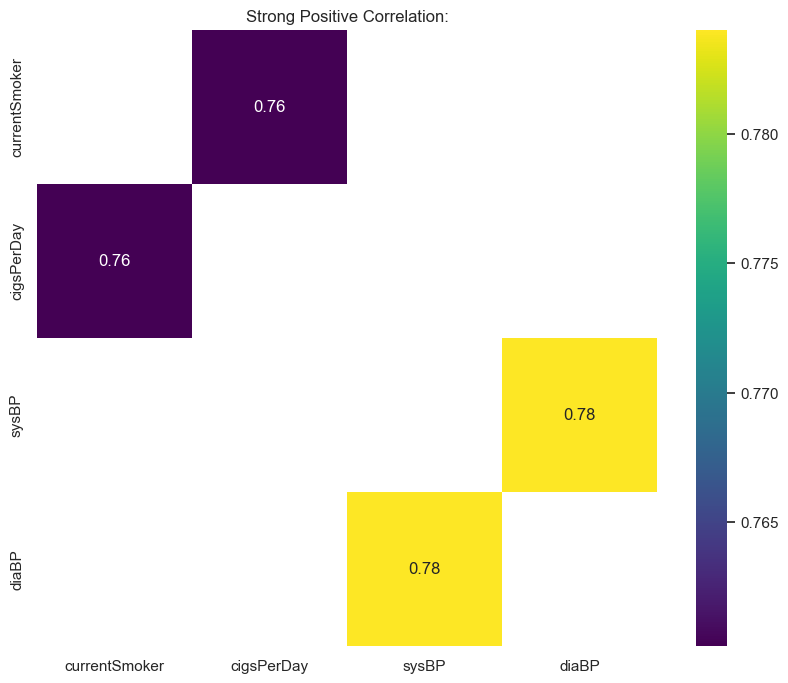

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(strong_positive_corr, annot=True, cmap='viridis', fmt=".2f")
plt.title('Strong Positive Correlation:')
plt.show()

#### Observation:

 Correlation plot gives us valuable information regarding Relation within Attributes. It can Either be Negative or Positive or Nill. We need to always keep 1 feature from 2 Strongly Correlated ones but since we want to perform EDA we'll keep all and drop them before modelling.

* currentSmoker & cigsPerDay has strong Correlation of 77 (Scaled for better Observations)


* sysBP and diaBP are positively correlated

In [35]:
#Descriptive Stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex_male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.0000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.0000,70.0
education,4238.0,1.979471,1.007081,1.00,1.00,2.0,3.0000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.0000,1.0
cigsPerDay,4238.0,8.941482,11.902399,0.00,0.00,0.0,20.0000,70.0
BPMeds,4238.0,0.029259,0.168552,0.00,0.00,0.0,0.0000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.0000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.0000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.0000,1.0
totChol,4238.0,236.689476,44.327427,107.00,206.00,234.0,262.0000,696.0


## Outliers Checking and handling

In [36]:
random=[i for i in df.columns if len(df[i].unique())>=4]

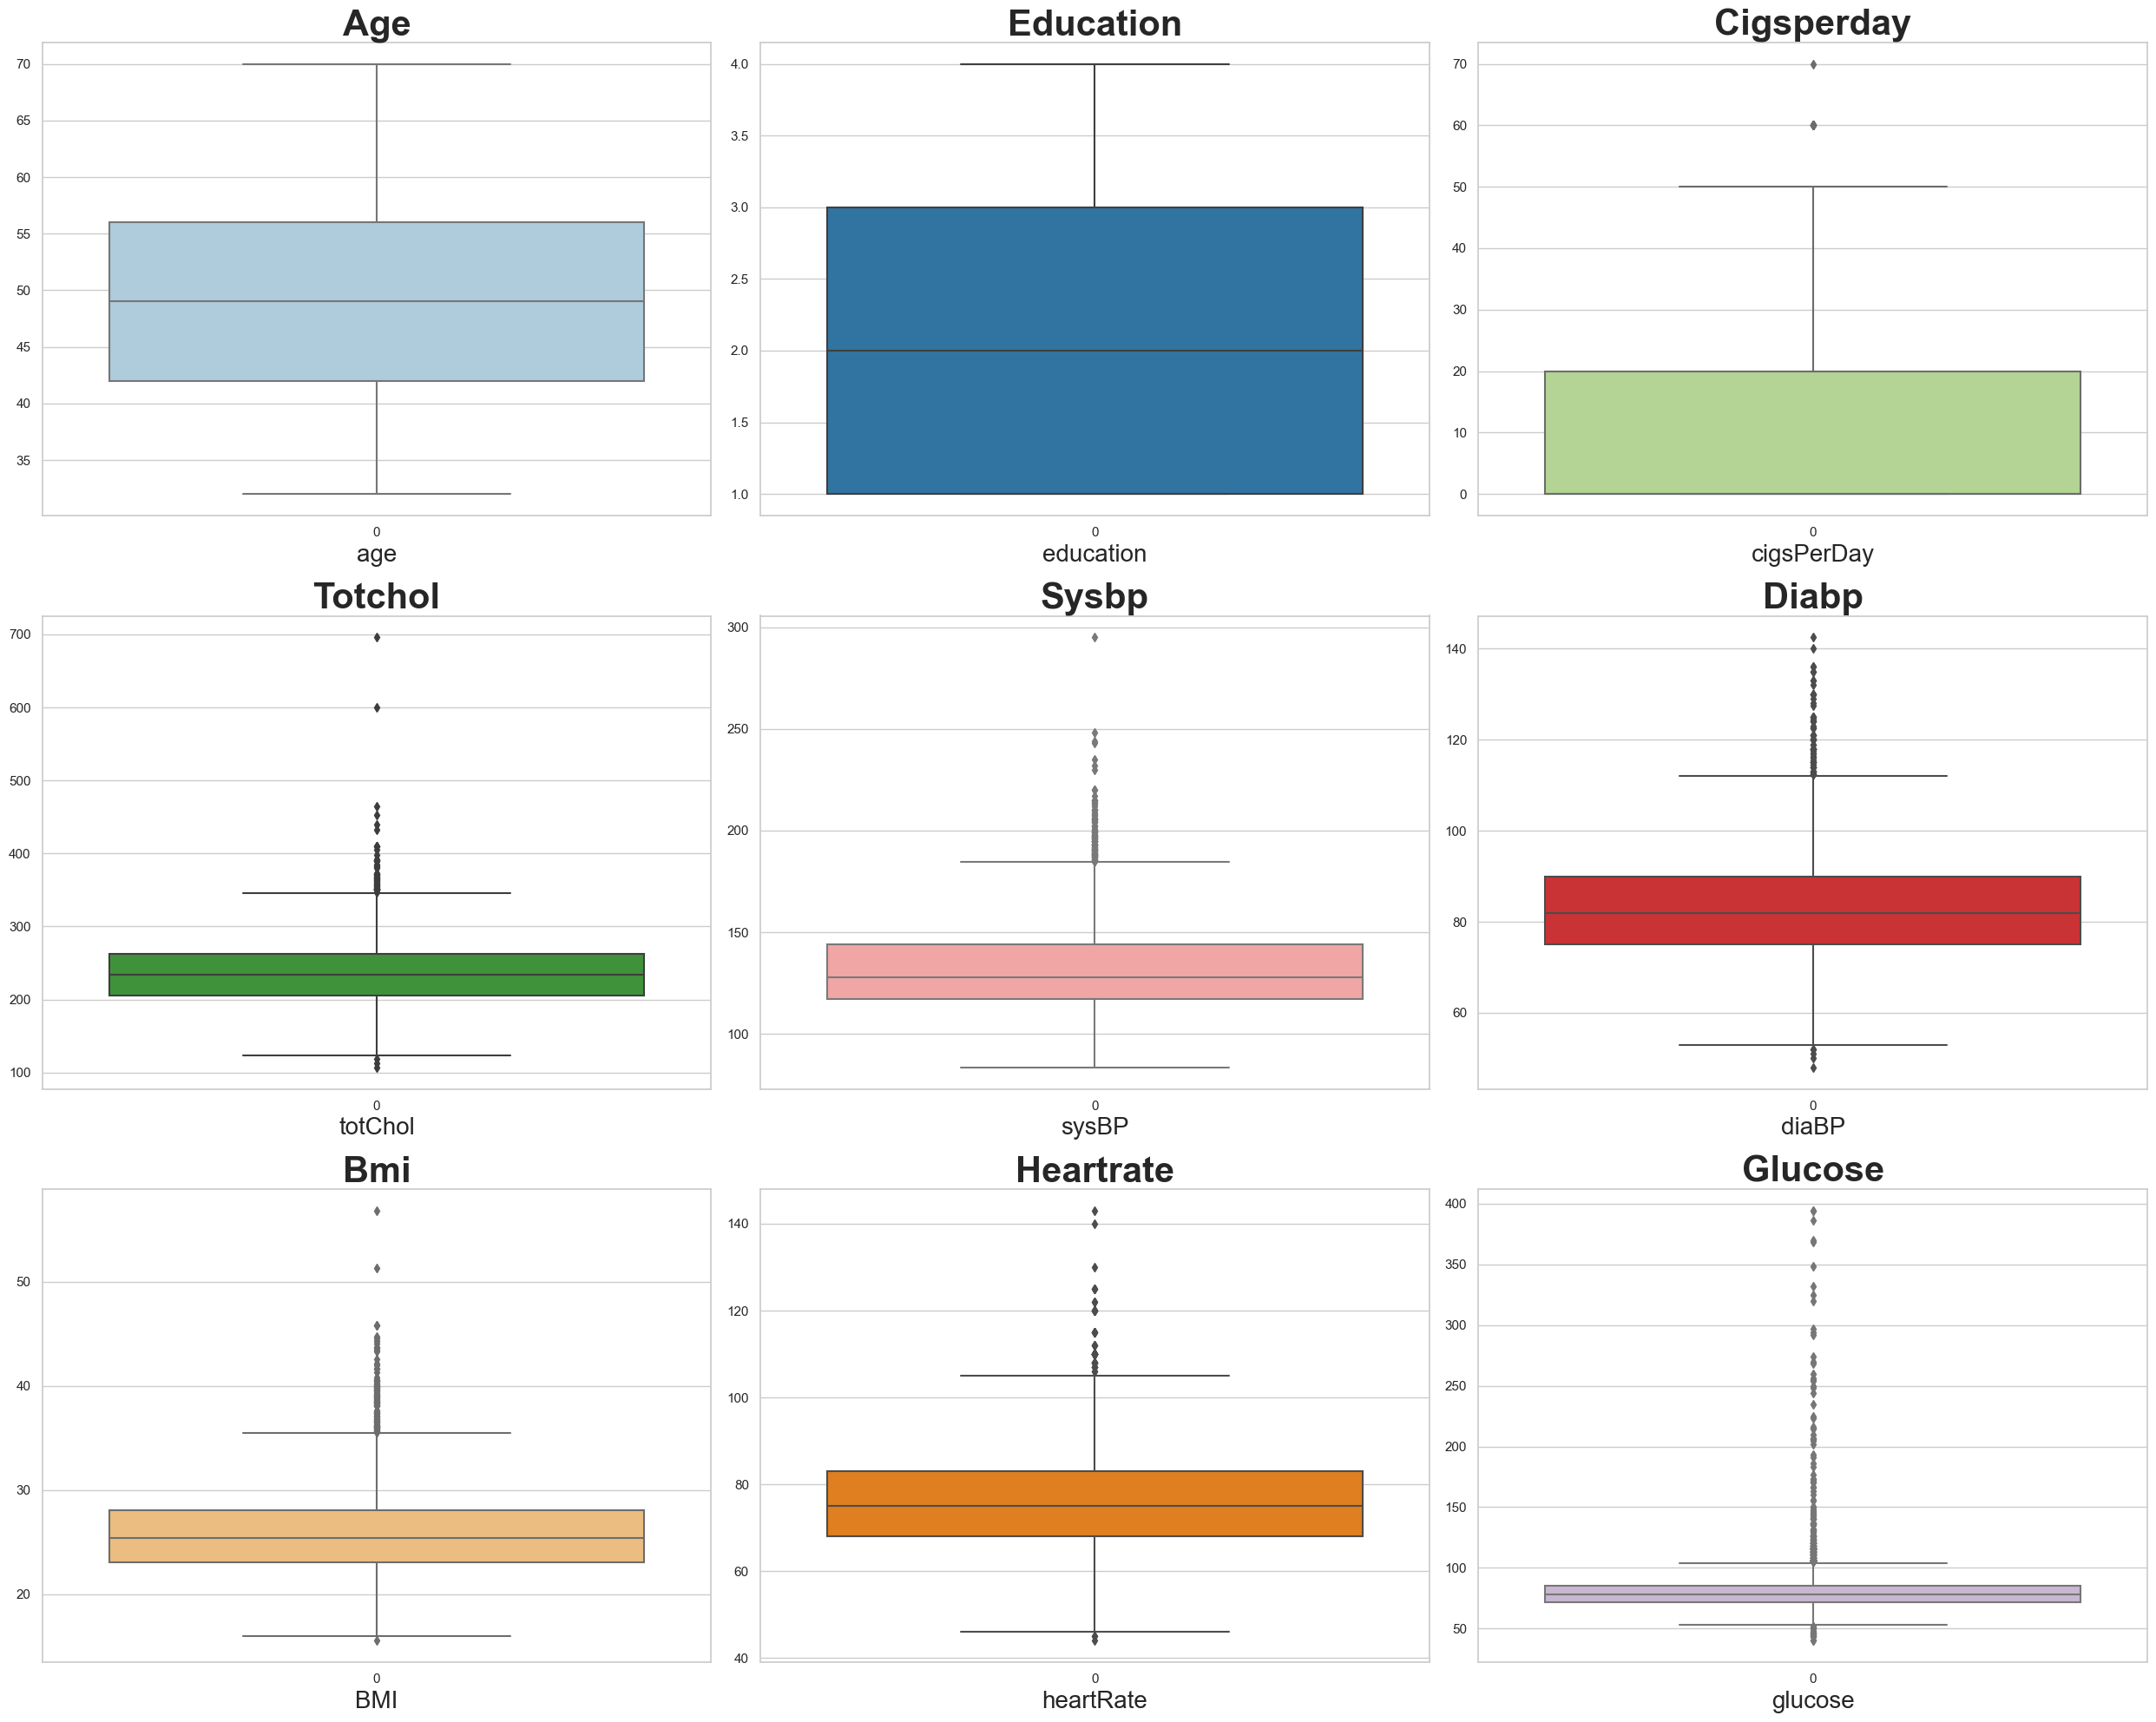

In [37]:
colors = sns.color_palette("Paired", len(random))
plt.figure(figsize=(25,20))
for n,column in enumerate(random):
    plot=plt.subplot(3,3,n+1)
    plt.xlabel(column,fontsize=20)
    sns.boxplot(df[column],color=colors[n])
    plt.title(f'{column.title()}',weight='bold',fontsize=30)
    plt.tight_layout()
plt.show()



Conclusion of Boxplot :

Outliers found in features named ['totChol', 'sysBP','diaBP', 'BMI','heartRate', 'glucose']


In [38]:
Q1 = np.percentile(df['totChol'], 25)
Q3 = np.percentile(df['totChol'], 75)
IQR = Q3 - Q1
IQR

56.0

In [39]:
lower_bound = Q1 - (1.5 * IQR)
lower_bound

122.0

In [40]:
upper_bound = Q3 + (1.5 * IQR)
upper_bound

346.0

In [41]:
df['totChol'] = np.where(df['totChol'] > 346.0,346.0,df['totChol'])

In [42]:
df['totChol'] = np.where(df['totChol'] < 122.0,122.0,df['totChol'])

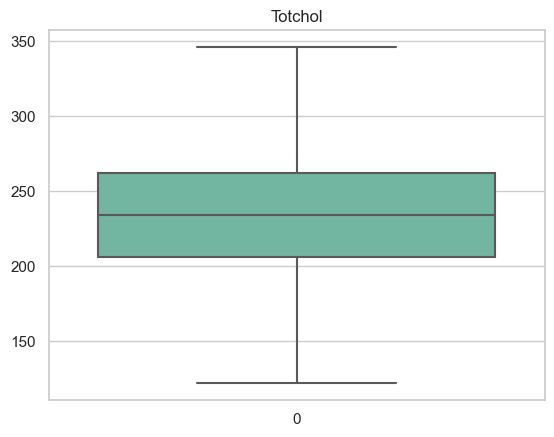

In [43]:
sns.boxplot(df['totChol'])
plt.title('Totchol')
plt.show()

In [44]:
Q1 = np.percentile(df['sysBP'], 25)
Q3 = np.percentile(df['sysBP'], 75)
IQR = Q3 - Q1
IQR

27.0

In [45]:
lower_bound = Q1 - (1.5 * IQR)
lower_bound

76.5

In [46]:
upper_bound = Q3 + (1.5 * IQR)
upper_bound

184.5

In [47]:
df['sysBP'] = np.where(df['sysBP'] > 184.5,184.5,df['totChol'])

In [48]:
df['sysBP'] = np.where(df['sysBP'] < 76.5,76.5,df['totChol'])

Text(0.5, 1.0, 'Sysbp')

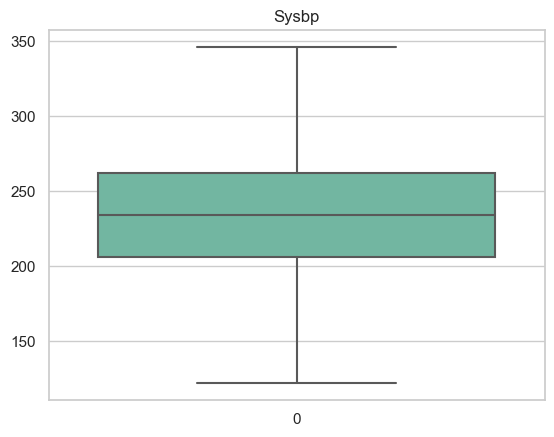

In [49]:
sns.boxplot(df['sysBP'])
plt.title('Sysbp')

In [50]:
Q1 = np.percentile(df['diaBP'], 25)
Q3 = np.percentile(df['diaBP'], 75)
IQR = Q3 - Q1
IQR

14.875

In [51]:
upper_bound = Q3 + (1.5 * IQR)
upper_bound

112.1875

In [52]:
lower_bound = Q1 - (1.5 * IQR)
lower_bound

52.6875

In [53]:
df['diaBP'] = np.where(df['diaBP'] > 112.1875,112.1875,df['diaBP'])

In [54]:
df['diaBP'] = np.where(df['diaBP'] < 52.6875,52.6875,df['diaBP'])

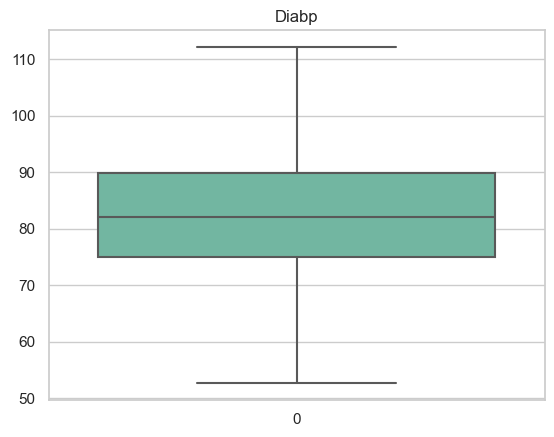

In [55]:
sns.boxplot(df['diaBP'])
plt.title('Diabp')
plt.show()

In [56]:
Q1 = np.percentile(df['BMI'], 25)
Q3 = np.percentile(df['BMI'], 75)
IQR = Q3 - Q1
IQR

4.957500000000003

In [57]:
upper_bound = Q3 + (1.5 * IQR)
upper_bound

35.47375000000001

In [58]:
lower_bound = Q1 - (1.5 * IQR)
lower_bound

15.643749999999994

In [59]:
df['BMI'] = np.where(df['BMI'] > 35.47375000000001,35.47375000000001,df['BMI'])

In [60]:
df['BMI'] = np.where(df['BMI'] < 15.643749999999994,15.643749999999994,df['BMI'])

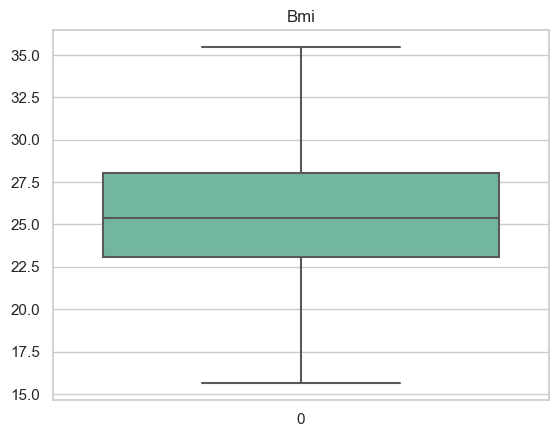

In [61]:
sns.boxplot(df['BMI'])
plt.title('Bmi')
plt.show()

In [62]:
Q1 = np.percentile(df['heartRate'], 25)
Q3 = np.percentile(df['heartRate'], 75)
IQR = Q3 - Q1
IQR

15.0

In [63]:
upper_bound = Q3 + (1.5 * IQR)
upper_bound

105.5

In [64]:
lower_bound = Q1 - (1.5 * IQR)
lower_bound

45.5

In [65]:
df['heartRate'] = np.where(df['heartRate'] > 105.5,105.5,df['heartRate'])

In [66]:
df['heartRate'] = np.where(df['heartRate'] < 45.5,45.5,df['heartRate'])

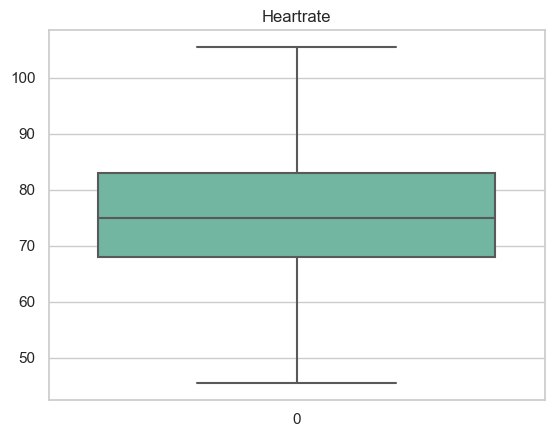

In [67]:
sns.boxplot(df['heartRate'])
plt.title('Heartrate')
plt.show()

In [68]:
Q1 = np.percentile(df['glucose'], 25)
Q3 = np.percentile(df['glucose'], 75)
IQR = Q3 - Q1
IQR

13.0

In [69]:
upper_bound = Q3 + (1.5 * IQR)
upper_bound

104.5

In [70]:
lower_bound = Q1 - (1.5 * IQR)
lower_bound

52.5

In [71]:
df['glucose'] = np.where(df['glucose'] > 104.5,104.5,df['glucose'])

In [72]:
df['glucose'] = np.where(df['glucose'] < 52.5,52.5,df['glucose'])

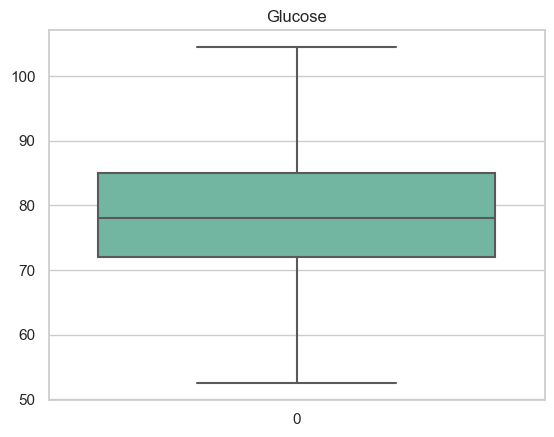

In [73]:
sns.boxplot(df['glucose'])
plt.title('Glucose')
plt.show()

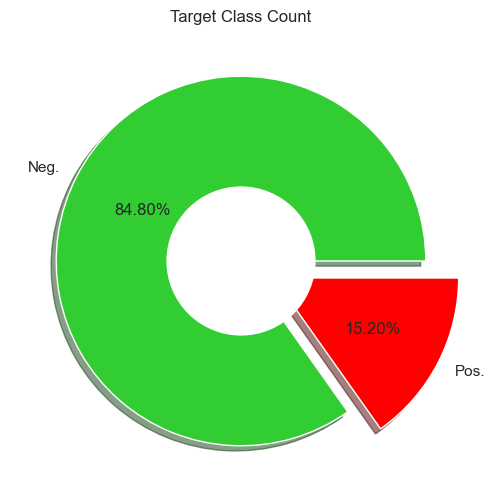

In [74]:
plt.figure(figsize=(6,6))
plt.pie(df['TenYearCHD'].value_counts(), labels=['Neg.','Pos.'], autopct='%1.2f%%', explode=[0,0.2], shadow=True, colors=['limegreen','red'],wedgeprops=dict(edgecolor='white'))
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Target Class Count')
plt.show()

#### Observation
* We can see that we've Imbalanced Dataset here having ratio of 85:15 where Positive Class is Minor.
* We'll need to Over-sample the Dataset in this case to get the best out of it.

## Model Building

In [75]:
x = df.drop('TenYearCHD',axis=1)
y = df['TenYearCHD']

In [76]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
x_res, y_res = oversample.fit_resample(x, y)

In [77]:
y_res.value_counts()

0    3594
1    3594
Name: TenYearCHD, dtype: int64

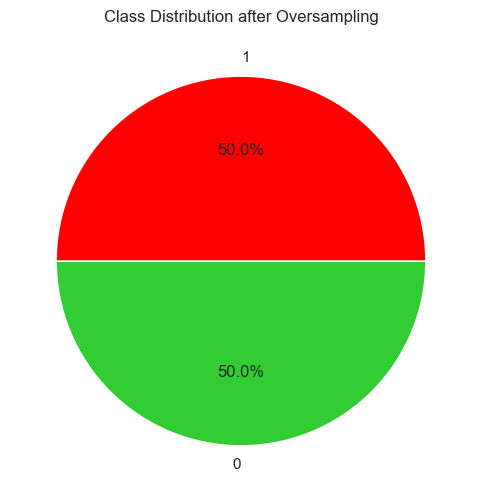

In [78]:
class_counts = y_res.value_counts()
labels = class_counts.index
sizes = class_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors=['limegreen','red'], startangle=180)
plt.title('Class Distribution after Oversampling')
plt.show()



##### now it looks balanced....

In [79]:
# Splitting the dataset into the Training set and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.25, random_state = 0)

In [80]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_scaled = sc.transform(x_train)
x_test_scaled = sc.transform(x_test)

## Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
lr_scaled = LogisticRegression()
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [82]:
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [83]:
print('Training Score:',100*lr_scaled.score(x_train_scaled,y_train))
print('Testing Score :',100*lr_scaled.score(x_test_scaled,y_test))

Training Score: 66.70376553515118
Testing Score : 68.16917084028937


In [84]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [85]:
#Printing Confussion matrix
cm = confusion_matrix(y_test, y_pred_scaled)
print('Confussion Matrix: ')
print(cm)

Confussion Matrix: 
[[598 299]
 [273 627]]


In [86]:
#Printing Classiification Report
lr_acc = accuracy_score(y_test, y_pred_scaled)
print(f"The accuracy score for LR is: {round(lr_acc,3)*100}%",'\n')
print('Classification Report:\n ' + str(classification_report(y_pred_scaled,y_test)))

The accuracy score for LR is: 68.2% 

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.69      0.68       871
           1       0.70      0.68      0.69       926

    accuracy                           0.68      1797
   macro avg       0.68      0.68      0.68      1797
weighted avg       0.68      0.68      0.68      1797



# KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
classifier= KNeighborsClassifier(n_neighbors=7, metric="minkowski",p=2)
classifier.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [89]:
y_pred_scaled= classifier.predict(x_test_scaled)

In [90]:
print('Training Score:',100*classifier.score(x_train_scaled,y_train))
print('Testing Score :',100*classifier.score(x_test_scaled,y_test))

Training Score: 80.63439065108514
Testing Score : 74.79131886477462


In [91]:
#Printing Confussion matrix
cm = confusion_matrix(y_test, y_pred_scaled)
print('Confussion Matrix: ')
print(cm)

Confussion Matrix: 
[[568 329]
 [124 776]]


In [92]:
#Printing Classiification Report
knn_acc = accuracy_score(y_test, y_pred_scaled)
print(f"The accuracy score for KNN is: {round(knn_acc,3)*100}%",'\n')
print('Classification Report:\n ' + str(classification_report(y_pred_scaled,y_test)))

The accuracy score for KNN is: 74.8% 

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.82      0.71       692
           1       0.86      0.70      0.77      1105

    accuracy                           0.75      1797
   macro avg       0.75      0.76      0.74      1797
weighted avg       0.77      0.75      0.75      1797



# NB

In [93]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train_scaled, y_train)

GaussianNB()

In [94]:
y_pred1 = clf.predict(x_test_scaled)

In [95]:
print('Training Score:',100*clf.score(x_train_scaled,y_train))
print('Testing Score :',100*clf.score(x_test_scaled,y_test))

Training Score: 59.07994806158412
Testing Score : 59.59933222036727


In [96]:
#Printing Confussion matrix
cm = confusion_matrix(y_test, y_pred1)
print('Confussion Matrix: ')
print(cm)

Confussion Matrix: 
[[810  87]
 [639 261]]


In [97]:
#Printing Classiification Report
nb_acc = accuracy_score(y_test, y_pred1)
print(f"The accuracy score for NB is: {round(nb_acc,3)*100}%",'\n')
print('Classification Report:\n ' + str(classification_report(y_pred1,y_test)))

The accuracy score for NB is: 59.599999999999994% 

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.56      0.69      1449
           1       0.29      0.75      0.42       348

    accuracy                           0.60      1797
   macro avg       0.60      0.65      0.55      1797
weighted avg       0.78      0.60      0.64      1797



# SVM

In [98]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train_scaled, y_train)

SVC()

In [99]:
y_pred2 = sv.predict(x_test_scaled)

In [100]:
print('Training Score:',100*sv.score(x_train_scaled,y_train))
print('Testing Score :',100*sv.score(x_test_scaled,y_test))

Training Score: 74.03079206084215
Testing Score : 71.84195882025598


In [101]:
#Printing Confussion matrix
cm = confusion_matrix(y_test, y_pred2)
print('Confussion Matrix: ')
print(cm)

Confussion Matrix: 
[[604 293]
 [213 687]]


In [102]:
#Printing Classiification Report
svm_acc = accuracy_score(y_test, y_pred2)
print(f"The accuracy score for SVM is: {round(svm_acc,3)*100}%",'\n')
print('Classification Report:\n ' + str(classification_report(y_pred2,y_test)))

The accuracy score for SVM is: 71.8% 

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.74      0.70       817
           1       0.76      0.70      0.73       980

    accuracy                           0.72      1797
   macro avg       0.72      0.72      0.72      1797
weighted avg       0.72      0.72      0.72      1797



# DecisionTreeClassifier

In [103]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [104]:
y_pred3 = DT.predict(x_test_scaled)

In [105]:
print('Training Score:',100*DT.score(x_train_scaled,y_train))
print('Testing Score :',100*DT.score(x_test_scaled,y_test))

Training Score: 100.0
Testing Score : 91.81969949916528


In [106]:
#Printing Confussion matrix
cm = confusion_matrix(y_test, y_pred3)
print('Confussion Matrix: ')
print(cm)

Confussion Matrix: 
[[757 140]
 [  7 893]]


In [107]:
#Printing Classiification Report
dt_acc = accuracy_score(y_test, y_pred3)
print(f"The accuracy score for DTC is: {round(dt_acc,3)*100}%",'\n')
print('Classification Report:\n ' + str(classification_report(y_pred3,y_test)))

The accuracy score for DTC is: 91.8% 

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       764
           1       0.99      0.86      0.92      1033

    accuracy                           0.92      1797
   macro avg       0.92      0.93      0.92      1797
weighted avg       0.93      0.92      0.92      1797



# RandomForest Classifier


In [108]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [109]:
y_pred4 = RF.predict(x_test_scaled)

In [110]:
print('Training Score:',100*RF.score(x_train_scaled,y_train))
print('Testing Score :',100*RF.score(x_test_scaled,y_test))

Training Score: 100.0
Testing Score : 96.43850862548692


In [111]:
#Printing Confussion matrix
cm = confusion_matrix(y_test, y_pred4)
print('Confussion Matrix: ')
print(cm)

Confussion Matrix: 
[[842  55]
 [  9 891]]


In [112]:
#Printing Classiification Report
rf_acc = accuracy_score(y_test, y_pred4)
print(f"The accuracy score for RFC is: {round(rf_acc,3)*100}%",'\n')
print('Classification Report:\n ' + str(classification_report(y_pred4,y_test)))

The accuracy score for RFC is: 96.39999999999999% 

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       851
           1       0.99      0.94      0.97       946

    accuracy                           0.96      1797
   macro avg       0.96      0.97      0.96      1797
weighted avg       0.97      0.96      0.96      1797



## Gradient Boosting Classifier

In [113]:
from sklearn.ensemble import GradientBoostingClassifier
gvc =  GradientBoostingClassifier()
gvc.fit(x_train_scaled,y_train)

GradientBoostingClassifier()

In [114]:
y_pred5 = gvc.predict(x_test_scaled)

In [115]:
print('Training Score:',100*gvc.score(x_train_scaled,y_train))
print('Testing Score :',100*gvc.score(x_test_scaled,y_test))

Training Score: 74.66147282507883
Testing Score : 71.89760712298275


In [116]:
#Printing Confussion matrix
cm = confusion_matrix(y_test, y_pred5)
print('Confussion Matrix: ')
print(cm)

Confussion Matrix: 
[[612 285]
 [220 680]]


In [117]:
#Printing Classiification Report
gbc_acc = accuracy_score(y_test, y_pred5)
print(f"The accuracy score for GBC is: {round(gbc_acc,3)*100}%",'\n')
print('Classification Report:\n ' + str(classification_report(y_pred5,y_test)))

The accuracy score for GBC is: 71.89999999999999% 

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.74      0.71       832
           1       0.76      0.70      0.73       965

    accuracy                           0.72      1797
   macro avg       0.72      0.72      0.72      1797
weighted avg       0.72      0.72      0.72      1797



## Model Evaluation

In [118]:
model_ev = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [lr_acc*100, knn_acc*100, nb_acc*100, svm_acc*100, dt_acc*100, rf_acc*100, gbc_acc*100]
})

print(model_ev)

                 Model   Accuracy
0  Logistic Regression  68.169171
1  K-Nearest Neighbour  74.791319
2          Naive Bayes  59.599332
3                  SVM  71.841959
4        Decision Tree  91.819699
5        Random Forest  96.438509
6    Gradient Boosting  71.897607


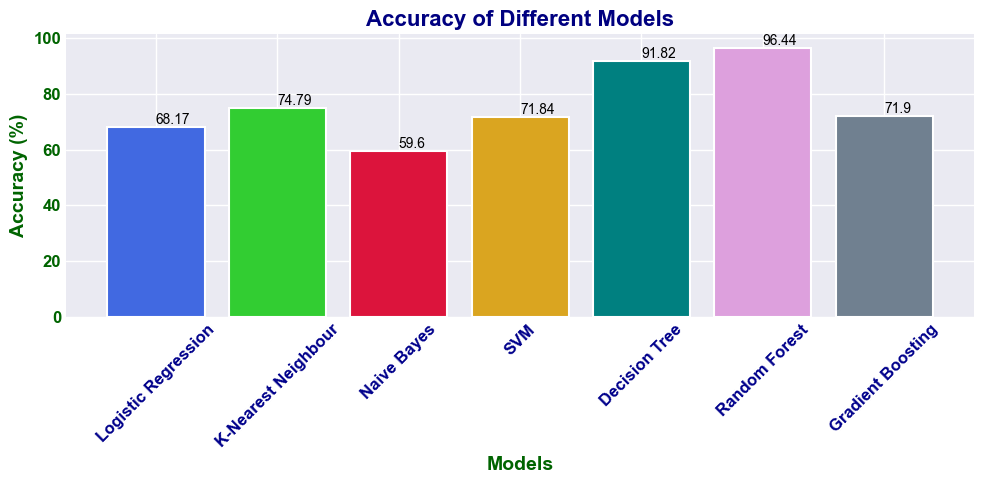

In [119]:
colors = ['royalblue', 'limegreen', 'crimson', 'goldenrod', 'teal', 'plum', 'slategray']

plt.figure(figsize=(10, 5))
plt.style.use('seaborn-darkgrid')
plt.title("Accuracy of Different Models", fontsize=16, fontweight='bold', color='navy')
plt.ylabel("Accuracy (%)", fontsize=14, fontweight='bold', color='darkgreen')
plt.xlabel("Models", fontsize=14, fontweight='bold', color='darkgreen')
bars = plt.bar(model_ev['Model'], model_ev['Accuracy'], color=colors,linewidth=1.5)  # Adding edgecolor and linewidth for 3D effect

# Adding data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', fontsize=10, color='black')

plt.xticks(rotation=45, fontsize=12, fontweight='bold', color='darkblue')
plt.yticks(fontsize=12, fontweight='bold', color='darkgreen')
plt.tight_layout()
plt.show()


## Cross Validation

In [122]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [123]:
num_folds = 5

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation
cv_scores = cross_val_score(DT, x_res, y_res, cv=skf, scoring='accuracy')

# Print Cross-Validation scores
print("Cross-Validation Scores:", cv_scores)
print(f"Mean CV Score:, {round(np.mean(cv_scores)*100, 2)}%")


Cross-Validation Scores: [0.92211405 0.92002782 0.91168289 0.91092554 0.90675017]
Mean CV Score:, 91.43%


In [124]:
num_folds = 5

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Perform Cross-Validation
cv_scores = cross_val_score(RF, x_res, y_res, cv=skf, scoring='accuracy')

# Print Cross-Validation scores
print("Cross-Validation Scores:", cv_scores)
print(f"Mean CV Score:, {round(np.mean(cv_scores)*100, 2)}%")

Cross-Validation Scores: [0.96870654 0.96244784 0.97566064 0.97355602 0.97286013]
Mean CV Score:, 97.06%
